# pandas

データ解析とかでよく使うライブラリ群。詳細はグーグル

## 一次元のデータ列

Seriesを用いる。

In [3]:
import pandas as pd 
from pandas import Series

In [2]:
obj = Series([3,5,6,7])
obj

0    3
1    5
2    6
3    7
dtype: int64

In [3]:
obj.values

array([3, 5, 6, 7])

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# indexに名前も使用可能
m2_cos = Series([2,3,4,5],index=['A','B','C','D'])

In [6]:
m2_cos

A    2
B    3
C    4
D    5
dtype: int64

In [7]:
m2_cos['A']

2

In [8]:
m2_cos[m2_cos >= 4] #条件式を使えばデータ抜粋も可能

C    4
D    5
dtype: int64

In [9]:
m2_cos >= 4

A    False
B    False
C     True
D     True
dtype: bool

In [10]:
# データを含むかの確認
'B' in m2_cos

True

In [12]:
# 辞書化も可能
m2_dict = m2_cos.to_dict()

In [13]:
m2_dict

{'A': 2, 'B': 3, 'C': 4, 'D': 5}

In [14]:
categoriy = ['A','B','C','D','E']

In [17]:
m3_cos = Series(m2_dict , index=categoriy)

In [18]:
m3_cos

A    2.0
B    3.0
C    4.0
D    5.0
E    NaN
dtype: float64

In [19]:
# NaN判定も可能
pd.isnull(m3_cos)

A    False
B    False
C    False
D    False
E     True
dtype: bool

In [20]:
pd.notnull(m3_cos)

A     True
B     True
C     True
D     True
E    False
dtype: bool

In [21]:
# Indexが同じであれば総和も可能
m2_cos + m3_cos

A     4.0
B     6.0
C     8.0
D    10.0
E     NaN
dtype: float64

In [22]:
# 名前の追加
m2_cos.name = 'ほげほげ'

In [23]:
m2_cos

A    2
B    3
C    4
D    5
Name: ほげほげ, dtype: int64

In [24]:
# Indexにも名前を付けられる
m2_cos.index.name = "ふがふが"

In [25]:
m2_cos

ふがふが
A    2
B    3
C    4
D    5
Name: ほげほげ, dtype: int64

# DataFrame

2次元のテーブル型のデータ。こちらもいろいろ使用可能

## 使用データ
https://en.wikipedia.org/wiki/List_of_all-time_NFL_win%E2%80%93loss_records

In [2]:
from pandas import Series, DataFrame

In [8]:
#クリップボードからデータ取得
# 次のURLにある表からコピーしておくのが元だが、docker+jupyter上では不可能 普通にcsvを作ったので、そちらを読み込ませる

# nfl_frame = pd.read_clipboard() #大本
nfl_frame = pd.read_csv("./NFLdata.csv")

In [9]:
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Dallas Cowboys,964,550,408,6,0.574,1960,NFC East
1,2,Green Bay Packers,"1,418",790,590,38,0.571,1921,NFC North
2,3,Baltimore Ravens,434,243,190,1,0.561,1996,AFC North
3,4,New England Patriots,966,537,420,9,0.561,1960,AFC East
4,5,Chicago Bears,"1,452",786,624,42,0.556,1920,NFC North
5,6,Miami Dolphins,882,485,393,4,0.552,1966,AFC East
6,7,Minnesota Vikings,952,516,425,11,0.548,1961,NFC North
7,8,Kansas City Chiefs,966,521,433,12,0.546,1960,AFC West
8,9,San Francisco 49ers[b],"1,084",574,496,14,0.536,1950,NFC West
9,10,Pittsburgh Steelers,"1,254",661,571,22,0.536,1933,AFC North


In [10]:
nfl_frame.columns #列表示

Index(['Rank', 'Team', 'GP', 'Won', 'Lost', 'Tied', 'Pct.', 'First NFL season',
       'Division'],
      dtype='object')

In [13]:
#特定の列取得
nfl_frame[['Team','First NFL season']]

,Team,First NFL season
0,Dallas Cowboys,1960
1,Green Bay Packers,1921
2,Baltimore Ravens,1996
3,New England Patriots,1960
4,Chicago Bears,1920
5,Miami Dolphins,1966
6,Minnesota Vikings,1961
7,Kansas City Chiefs,1960
8,San Francisco 49ers[b],1950
9,Pittsburgh Steelers,1933


In [20]:
# 新しいデータの取得
new_frame = DataFrame(nfl_frame,columns=['Team','First NFL season', 'Sad'])

In [21]:
# 先頭/末尾取得
nfl_frame.head(5)
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL season,Division
0,1,Dallas Cowboys,964,550,408,6,0.574,1960,NFC East
1,2,Green Bay Packers,"1,418",790,590,38,0.571,1921,NFC North
2,3,Baltimore Ravens,434,243,190,1,0.561,1996,AFC North
3,4,New England Patriots,966,537,420,9,0.561,1960,AFC East
4,5,Chicago Bears,"1,452",786,624,42,0.556,1920,NFC North
5,6,Miami Dolphins,882,485,393,4,0.552,1966,AFC East
6,7,Minnesota Vikings,952,516,425,11,0.548,1961,NFC North
7,8,Kansas City Chiefs,966,521,433,12,0.546,1960,AFC West
8,9,San Francisco 49ers[b],"1,084",574,496,14,0.536,1950,NFC West
9,10,Pittsburgh Steelers,"1,254",661,571,22,0.536,1933,AFC North


In [22]:
# 特定のIndex取得 ixは古いのでloc/ilocを使う
# nfl_frame.ix(5) #非推奨
nfl_frame.iloc[5]

Rank                             6
Team                Miami Dolphins
GP                             882
Won                            485
Lost                           393
Tied                             4
Pct.                         0.552
First NFL season              1966
Division                  AFC East
Name: 5, dtype: object

In [23]:
# 列削除
del new_frame['Sad']

In [24]:
new_frame

,Team,First NFL season
0,Dallas Cowboys,1960
1,Green Bay Packers,1921
2,Baltimore Ravens,1996
3,New England Patriots,1960
4,Chicago Bears,1920
5,Miami Dolphins,1966
6,Minnesota Vikings,1961
7,Kansas City Chiefs,1960
8,San Francisco 49ers[b],1950
9,Pittsburgh Steelers,1933


# Index操作

Indexの基本的な操作部分のまとめ

In [25]:
my_ser = Series([1,2,3,4],index=['A','B','C','D'])

In [26]:
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [27]:
#indexの取得
my_index = my_ser.index

In [28]:
my_index[0]

'A'

In [29]:
my_index[2:]

Index(['C', 'D'], dtype='object')

In [30]:
#pandasではindex置き換えは不可能 これはデータの信頼性向上のためのpandaの仕様によるもの
my_index[0] = 'Z'

TypeError: Index does not support mutable operations

# Indexの変更

pandasではIndexを直接変更できないため、その場合の変更方法

変更したい対象に対してメソッド「reindex」を使用するだけでよい

In [33]:
# テーブルの作成
from numpy.random import randn

serl = Series([1,2,3,4],index=['A','B','C','D'])

serl

A    1
B    2
C    3
D    4
dtype: int64

In [35]:
# 新しいIndexのテーブルをもとのserlから”新規作成"する。元のテーブルに影響はない
serl2 = serl.reindex(['A','B','C','D','E','F'],fill_value=0)
serl2

A    1
B    2
C    3
D    4
E    0
F    0
dtype: int64

In [36]:
serl

A    1
B    2
C    3
D    4
dtype: int64

In [39]:
ser3 = Series(['USA','Mexico','Canada'], index=[0,5,10])
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [40]:
# indexを0-15にする。値は直前の値で埋めてよいのであるなら、以下で自動付け替えが可能
ser3.reindex(range(15), method='ffill')　#ffill : forward filling

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

# 行列の削除

dropなどで可能

In [6]:
import numpy as np
import pandas as pd 
from pandas import Series

serl =  Series(np.arange(3),index=['A','B','C'])
serl

A    0
B    1
C    2
dtype: int64

In [10]:
# 列を削除した新しいテーブルを作成する 削除したい列がある場合はaxisで指定
serl.drop("A", axis=0)

B    1
C    2
dtype: int64

In [11]:
#元データは問題ない
serl

A    0
B    1
C    2
dtype: int64

# データの取得
データの取得方法
SeriesもDataFrameも似ているので、Seriesのみ抜粋

In [23]:
absserl =  Series(np.arange(3),index=['A','B','C'])

In [13]:
# indexでの取得
serl[['A','B']]

A    0
B    1
dtype: int64

In [18]:
# 条件による取得
serl[serl>1] = 10
serl

A     0
B     1
C    10
dtype: int64

In [19]:
serl > 3

A    False
B    False
C     True
dtype: bool

In [28]:
# 行アクセス ixではなくloc
serl.loc['A'] #index名で指定するパターン

0

In [30]:
serl.iloc[0]  #値で列を抽出するパターン

0

# データの並び替え
以下のメソッドを使えば並び替えが可能
値 : order
index: sort_index
を使用する

In [31]:
#　ソート対象のindex
sor1 =  Series(np.arange(3),index=['C','B','A'])

In [34]:
sor1.sort_index()

A    0
B    1
C    2
dtype: int64

In [43]:
from numpy.random import randn
sor2 = Series(randn(10))
sor2

0   -0.178439
1    1.624297
2   -0.913046
3   -0.694735
4   -0.143532
5    0.962101
6   -0.114381
7   -0.902551
8    0.867554
9   -0.017409
dtype: float64

In [44]:
#orderは古いので注意。今は普通にsort_valuesでよい
sor2.sort_values()

2   -0.913046
7   -0.902551
3   -0.694735
0   -0.178439
4   -0.143532
6   -0.114381
9   -0.017409
8    0.867554
5    0.962101
1    1.624297
dtype: float64

In [45]:
# 大きさ順に並べた時のIndexを指してくれる
sor2.rank()

0     4.0
1    10.0
2     1.0
3     3.0
4     5.0
5     9.0
6     6.0
7     2.0
8     8.0
9     7.0
dtype: float64

In [46]:
sor3 = Series(randn(10))
# 破壊的なソート処理はもう無い。必要なら代入なりで対処する
#sor3.sort()

AttributeError: 'Series' object has no attribute 'sort'

# 統計量の計算

pandaで統計量に関係する計算を行う場合のもの

In [50]:
from pandas import Series,DataFrame

serl =  np.array([[1,2,np.nan],[3,4,np.nan]])
serl

array([[ 1.,  2., nan],
       [ 3.,  4., nan]])

In [52]:
dframe1 = DataFrame(serl)
dframe1

,0,1,2
0,1.0,2.0,NaN
1,3.0,4.0,NaN


In [56]:
# axis=0方向で総和(列)
dframe1.sum()

0    4.0
1    6.0
2    0.0
dtype: float64

In [59]:
# axis=1方向での総和(行)
dframe1.sum(axis = 1)

0    3.0
1    7.0
dtype: float64

In [54]:
# axis=0での最小値
dframe1.min()

0    1.0
1    2.0
2    NaN
dtype: float64

In [55]:
# axis=1での最大値
dframe1.max()

0    3.0
1    4.0
2    NaN
dtype: float64

In [60]:
# 累計の計算
dframe1.cumsum()

,0,1,2
0,1.0,2.0,NaN
1,4.0,6.0,NaN


In [62]:
# 統計的な基本的な情報
dframe1.describe()

,0,1,2
count,2.000000,2.000000,0.0
mean,2.000000,3.000000,NaN
std,1.414214,1.414214,NaN
min,1.000000,2.000000,NaN
25%,1.500000,2.500000,NaN
50%,2.000000,3.000000,NaN
75%,2.500000,3.500000,NaN
max,3.000000,4.000000,NaN


In [6]:
# 株価の取得
#import pandas.io.data as pdweb #すでにpandas.io.dataは使えない。代わりにpandas_datareader
import datetime
import pandas_datareader.data as web

# すでに非推奨
# prices = pbweb.get_data_yahoo(['CVX','XOM','BP'],
#                              start=datetime.datetime(2010,1,1),
#                              end=datetime.datetime(2013,1,1))['Abj Close']

# 今はこちらを使用する ...と思いきや、こちらも最近yahooのAPIが変わって使えなくなっている模様
# https://teratail.com/questions/9q8zc5eccp9796
#prices = web.DataReader('9984.T', 'yahoo',
#                        start = datetime.datetime(2010,1,1), 
#                        end = datetime.datetime(2013,1,1))
#
#df.head()

TypeError: string indices must be integers

In [25]:
# yfinanceによる株価取得
import yfinance as yf
import datetime as dt
# 取得する時刻の指定
start = dt.datetime(2020,1,1)
end =  dt.datetime(2022,1,1)

# yfinanceを使ってデータ取得
data = yf.download(['CVX','BP','DJI'], start , end)['Adj Close']
data.head()

[*********************100%***********************]  3 of 3 completed


,BP,CVX,DJI
Date,,,
2020-01-02,31.877264,104.474892,NaN
2020-01-03,32.453972,104.113533,28634.900391
2020-01-06,33.306480,103.760780,28703.400391
2020-01-07,32.955444,102.435806,28583.699219
2020-01-08,32.453972,101.265709,28745.099609


In [26]:
# 株価の変化
rets = data.pct_change()

In [27]:
rets.head()

,BP,CVX,DJI
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.018092,-0.003459,NaN
2020-01-06,0.026268,-0.003388,0.002392
2020-01-07,-0.010540,-0.012770,-0.004170
2020-01-08,-0.015217,-0.011423,0.005647


<AxesSubplot:xlabel='Date'>

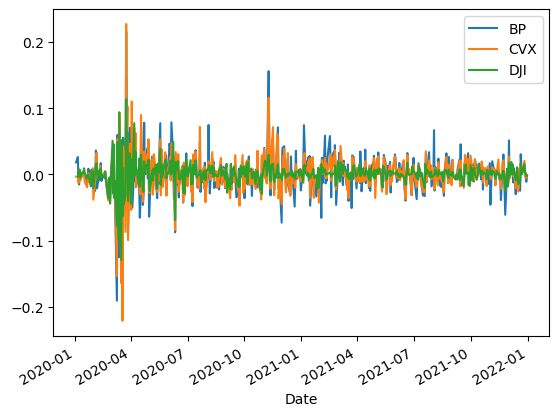

In [28]:
# 変化の描画
rets.plot()

In [29]:
# 相関係数の取得
rets.corr( method = 'pearson')

,BP,CVX,DJI
BP,1.000000,0.841622,0.650261
CVX,0.841622,1.000000,0.767157
DJI,0.650261,0.767157,1.000000


<AxesSubplot:>

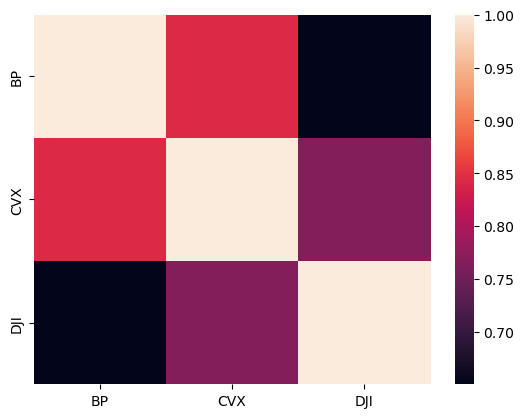

In [30]:
# ヒートマップの表示
import seaborn as sns

sns.heatmap(rets.corr())

In [32]:
# 重複したデータの確認
from pandas import Series
serl = Series(['w','y','w','x','w','y','z'])
serl.unique()

array(['w', 'y', 'x', 'z'], dtype=object)